In [112]:
# Module with plot capabilities
import matplotlib.pyplot as plt
import seaborn as sns
import hyperspy.api as hs

# Module with scientific computing functions (matrix/vector)
import numpy as np                

# Modules with reading/write folder/file functions
import os
from pathlib import Path
import SimpleITK as sitk

# module to deal with images
import uproot

# The following command display the current working directory (where jupyter has been launched)
cwd = os.getcwd()
print('The Current Working Directory (CWD) is: \n', cwd)
folder = Path()

# Display the content of a folder
output_folder = Path('./output')
if not output_folder.is_dir():
    print('ERROR: {} is not a folder.'.format(output_folder))
else:
    print('The folder and contains the following files:'.format(output_folder))
    p = output_folder.glob('**/*')
    files = [x for x in p if x.is_file()]
    for x in files:
        print(x)

The Current Working Directory (CWD) is: 
 /workspace/gate/VHEE_monitor
The folder and contains the following files:
output/stats.txt
output/spect_hits.root
output/c11hits.root
output/c11data.root
output/spect_data.root


In [113]:
f = uproot.open('output/c11hits.root')
print("List of tree : \n", f.keys())
hits = f['Singles']
print('Number of hits:', hits.num_entries)
print('Hits keys: ')
for i in hits.keys():
    print(i, ' ', end='')

List of tree : 
 ['Singles;1']
Number of hits: 8290.0
Hits keys: 
PostPosition_X  PostPosition_Y  PostPosition_Z  PreKineticEnergy  TotalEnergyDeposit  PreDirection_X  PreDirection_Y  PreDirection_Z  PreStepUniqueVolumeID  GlobalTime  

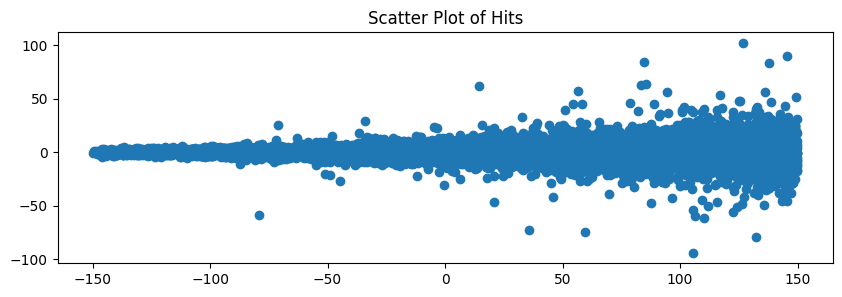

In [114]:
hits_y = np.array(hits.arrays()['PostPosition_Y'])
hits_z = np.array(hits.arrays()['PostPosition_Z'])
hits_x = np.array(hits.arrays()['PostPosition_X'])
preKinEnergy = np.array(hits.arrays()['PreKineticEnergy'])  

preKinEnergy_enwin = np.logical_and(preKinEnergy > 0, preKinEnergy < 2)

masky=np.logical_and(hits_y > -3, hits_y < 3)
hits_y_enwin = hits_y[preKinEnergy_enwin]
hits_z_enwin = hits_z[preKinEnergy_enwin]


plt.figure(figsize=(10, 3))

plt.scatter(x=hits_z, y=hits_y)

plt.title('Scatter Plot of Hits')
plt.show()







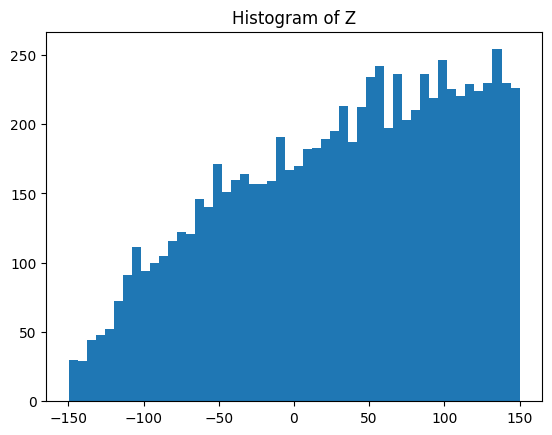

In [115]:
plt.hist(hits_z, bins=50)
plt.title('Histogram of Z')
plt.show()



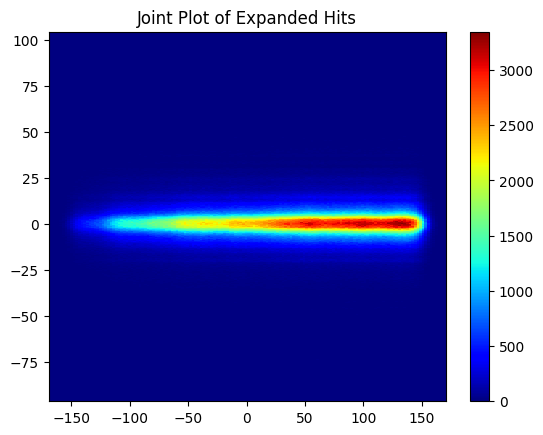

In [116]:
from scipy.stats import gaussian_kde

pointzy=np.column_stack((hits_z, hits_y))
#sns.jointplot(x=hits_z, y=hits_y, kind='kde')
#plt.title('Joint Plot of Hits')
#plt.show()

# Expanding hits_z and hits_y with 1000 times the points they already have
# Smooth the distributions

# Using Kernel Density Estimation (KDE) for smoothing individual distributions
kde_z = gaussian_kde(hits_z, bw_method=0.07)
kde_y = gaussian_kde(hits_y, bw_method=0.07)

kde_z = kde_z.resample(10000000)[0]
kde_y = kde_y.resample(10000000)[0]


# Plotting the expanded data
plt.hist2d(kde_z, kde_y, bins=(150,500), cmap='jet')
plt.colorbar()
plt.title('Joint Plot of Expanded Hits')
plt.show()



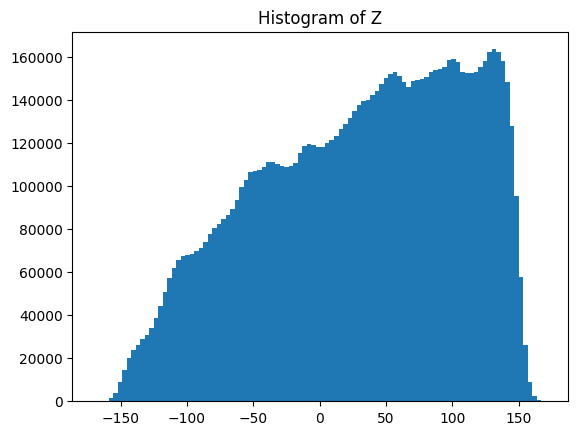

In [117]:
plt.hist(kde_z, bins=100)
plt.title('Histogram of Z')
plt.show()
